In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


Here we consider the five levels system. 70s, 6p and 5s rubidium levels.

- The trap laser couple the 5s (F=2) with the 5p to cool the atoms. From the 5p they decade to the 5s with equal probability to the F=1 or F=2. Since the trap couple only the F=2 to the 5p we use an other laser to couple the 5s(F=1) to the 5p.

- Then we use a two photon proces to couple the 5s(F=2) to the 70s. We use a blue-detuned blue laser to couple out of resonance the 5s with the 6p, and a red-detuned IR laser to couple out of resonance the 6p with the 70s.

- Then to controll the dissipation we use an other beam to stimolate the decay from the 70s to the 6p, then use the spontaneus decay of the 6p, that is much faster than the stimolated decay of the 70s, to couple the 6p with the 5s. We assume that there is a fixed probability for an atom to decay from 6p to the F=1 or F=2 of the 5s.

Equations:

$$ 0\;) \;\; \frac{dN_{5sF1}}{dt} = N_{6p}\Gamma_{spon}^{6p}p_{6p} + N_{5p}\Gamma_{spon}^{5p}p_{5p} - N_{5sF1}\Gamma_{rip} $$

$$ 1\;) \;\; \frac{dN_{5sF2}}{dt} = N_{6p}\Gamma_{spon}^{6p}(1-p_{6p}) + N_{5p}\Gamma_{spon}^{5p}(1-p_{5p}) - N_{5sF2}(\Gamma_{trap} + \Gamma_{exct})$$

$$ 2\;) \;\; \frac{dN_{5p}}{dt} = N_{5sF1}\Gamma_{rip} + N_{5sF2}\Gamma_{trap} - N_{5p} \Gamma_{spon}^{5p}$$

$$ 3\;) \;\; \frac{dN_{6p}}{dt} = N_{70s}\Gamma_{dep} - N_{6p} \Gamma_{spon}^{6p} $$

$$ 4\;) \;\; \frac{dN_{70s}}{dt} = N_{5sF2}\Gamma_{exct} + (N_{6p} - N_{70s}) \Gamma_{dep} $$

Where $p_{6p}$ is the probability to fall in the 5s(F=1) from the 6p and $p_{5p}$ is the probability to fall in the 5s(F=1) from the 5p.

[80. 80. 80. 80. 80. 80. 80. 80. 80. 80.]


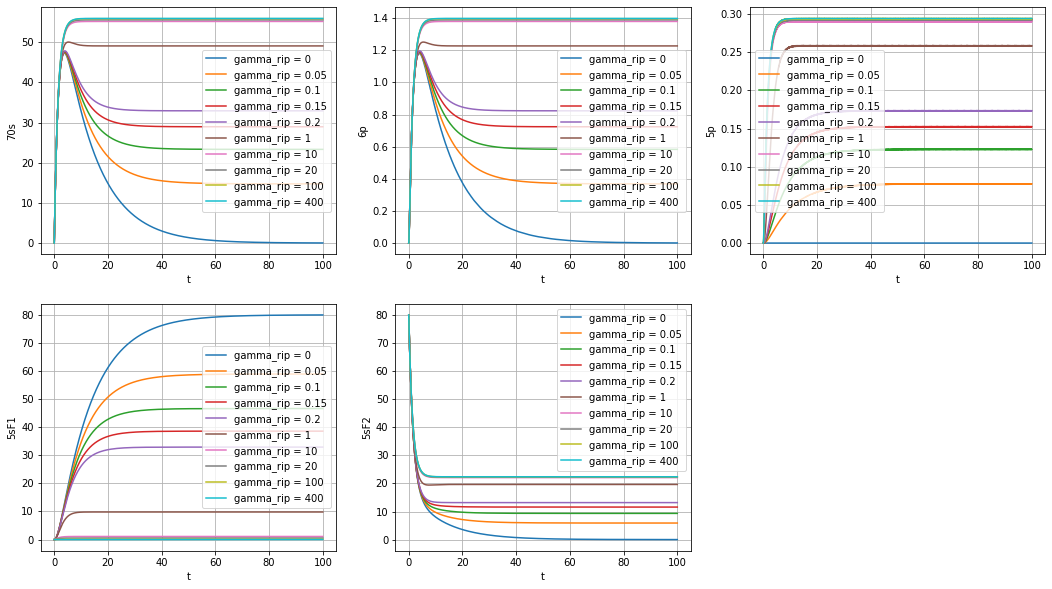

In [6]:
# rates expressed in Mhz
gamma_spon_6p = 8
gamma_spon_5p = 38
#gamma_ripump = 0.1
gamma_trap = 0
gamma_exct = 0.5
gamma_depumping = 0.2
prob_5p = 0.5
prob_6p = 0.5
initial_N_5sF2 = 80
gamma_ripump_range = [0, 0.05, 0.1, 0.15, 0.2, 1, 10, 20, 100, 400]
#gamma_exct_range = [0, 0.05, 0.1, 0.15, 0.2, 38]
results = {"70s": [], "6p": [], "5p": [], "5sF1": [], "5sF2": []}

for gamma_ripump in gamma_ripump_range:
    
    equations = np.array([
        [-gamma_ripump        , 0                        , gamma_ripump  , 0              , 0               ], 
        [0                    , -gamma_trap-gamma_exct   , gamma_trap    , 0              , gamma_exct      ], 
        [gamma_spon_5p*prob_5p, gamma_spon_5p*(1-prob_5p), -gamma_spon_5p, 0              , 0               ],
        [gamma_spon_6p*prob_6p, gamma_spon_6p*(1-prob_6p), 0             , -gamma_spon_6p , 0               ], 
        [0                    , 0                        , 0             , gamma_depumping, -gamma_depumping]
    ])

    F = lambda t, s: np.dot(equations.T, s)

    t_eval = np.arange(0, 100, 0.01)
    sol = solve_ivp(F, [0, 100], [0, initial_N_5sF2, 0, 0, 0], t_eval=t_eval, method="RK45")

    results["70s"].append(sol.y.T[:, 4])
    results["6p"].append(sol.y.T[:, 3])
    results["5p"].append(sol.y.T[:, 2])
    results["5sF1"].append(sol.y.T[:, 0])
    results["5sF2"].append(sol.y.T[:, 1])


plt.figure(figsize = (18, 10))
final_tot_atoms = np.zeros(len(gamma_ripump_range))

for j, level_plotted in enumerate(results.keys()):
    
    k = 231+j
    plt.subplot(k)
    for i, sol in enumerate(results[level_plotted]):
        plt.plot(t_eval, sol, label=f"gamma_rip = {gamma_ripump_range[i]}")
        final_tot_atoms[i]+=sol[-1]
    plt.xlabel('t')
    plt.ylabel(level_plotted)
    plt.legend()
    
    plt.grid()

print(final_tot_atoms)